# Conclusion

In section 3 and 4, We tried logistic regression, decision tree and random forest parallel operation models on the CIC-IDS-2017 data set through 'spark', and compared the computational performance with similar algorithms in the classic machine learning library 'sklearn'. 

In [2]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
time_dt = pickle.load(open('time_dt.p','rb'))
time_rf_spark = pickle.load(open('time_rf_spark.p','rb'))
time_rf_sklearn = pickle.load(open('time_rf_sklearn.p','rb'))
time_lr_sklearn = pickle.load(open('time_single.p','rb'))
time_lr_spark = pickle.load(open('time_parallel.p','rb'))

In [5]:
print('logistic regression by spark cost',time_lr_spark)
print('logistic regression by sklearn cost',time_lr_sklearn)

logistic regression by spark cost 54.450724601745605
logistic regression by sklearn cost 7.245623826980591


In [6]:
print('decison tree by spark cost',time_dt[0])
print('decison tree by sklearn cost',time_dt[1])

decison tree by spark cost 7.913947582244873
decison tree by sklearn cost 3.339034080505371


We can see that the results of logistic regression and decision tree are abnormal, and the parallel operation takes longer. We guess that this may be because the data set is too small, the similar algorithms in the two libraries are not completely consistent, or the model itself is not suitable for parallel algorithms. 

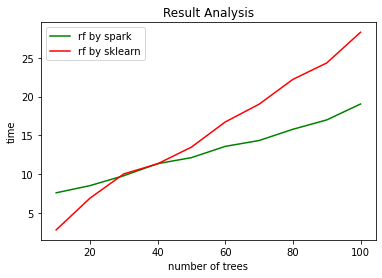

In [7]:
x_axix=range(10,101,10)

plt.title('Result Analysis')
plt.plot(x_axix, time_rf_spark, color='green', label='rf by spark')
plt.plot(x_axix, time_rf_sklearn, color='red', label='rf by sklearn')

plt.legend() 

plt.xlabel('number of trees')
plt.ylabel('time')
plt.show()

But the result of random forest is reasonable. When the number of trees in the random forest increases, that is, the algorithm becomes more complex, the parallel computing in spark has a smaller increase in time. When the number of trees exceeds a certain threshold, the random forest model based on parallel computing has better computing performance.

This is well understood, because the random forest is an integration of decision trees. When it contains a lot of trees, parallel operations can better help it run each decision tree at the same time. 

In short, when the computational load of the model is large or the algorithm principle is suitable for the parallel mechanism, the parallel operation can play a better role. 